In [7]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install scikit-plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.metrics import mean_absolute_error, roc_curve, roc_auc_score
import statsmodels.api as sm
import warnings

%matplotlib inline

0.07333599043443603
[0.         0.44967742 1.        ]


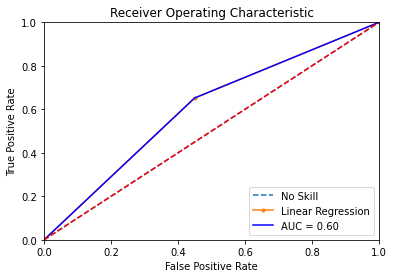

[0.         0.40043011 1.        ]


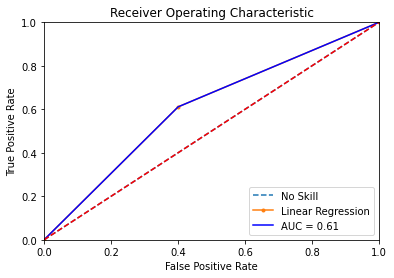

[0.         0.35290323 1.        ]


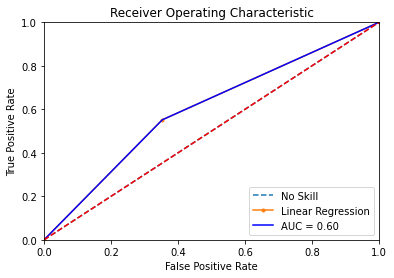

[0.         0.29526882 1.        ]


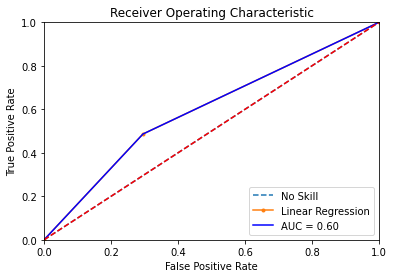

[0.         0.22408602 1.        ]


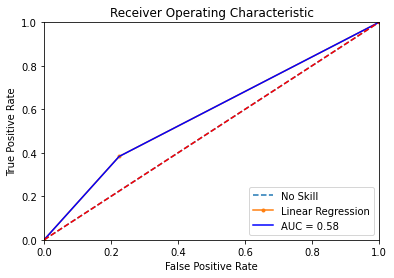

[0.         0.12795699 1.        ]


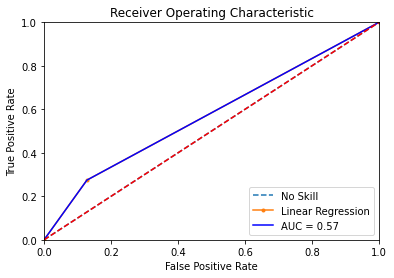

In [14]:
def run_ROC(th):
    data = pd.read_excel("AUC_data.xlsx")
    
    # Determin mean and do replacement
    data['Train_Y'] = np.where(data['Train_Y'] >= th, 1, 0)
    data['Test_Y'] = np.where(data['Test_Y'] >= th, 1, 0)
    
    data.dropna(inplace=True)

    # Calculate values for the roc curve ...
    ns_fpr, ns_tpr, th1 = roc_curve(data.Test_Y, [0 for _ in range(len(data))]) # no skill curve
    rf_fpr, rf_tpr, th2 = roc_curve(data.Test_VT, data.Test_Y) # Regression curve

    # Print roc points values
    print(rf_fpr)

    # Build graph
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(rf_fpr, rf_tpr, marker='.', label='Linear Regression')
    
    roc_auc = skplt.metrics.auc(rf_fpr, rf_tpr)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(rf_fpr, rf_tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
# Import data sheet
data = pd.read_excel("AUC_data.xlsx")

print(data.Test_VT.mean())
    
run_ROC(data.Test_VT.mean())
run_ROC(data.Test_VT.mean() + (data.Test_VT.mean() * 0.1))
run_ROC(data.Test_VT.mean() + (data.Test_VT.mean() * 0.2))
run_ROC(data.Test_VT.mean() + (data.Test_VT.mean() * 0.3))
run_ROC(data.Test_VT.mean() + (data.Test_VT.mean() * 0.4))
run_ROC(data.Test_VT.mean() + (data.Test_VT.mean() * 0.5))